# Total Market Price / Average Daily

this helps us understand how price changes overtime or rather rather price of product purchased

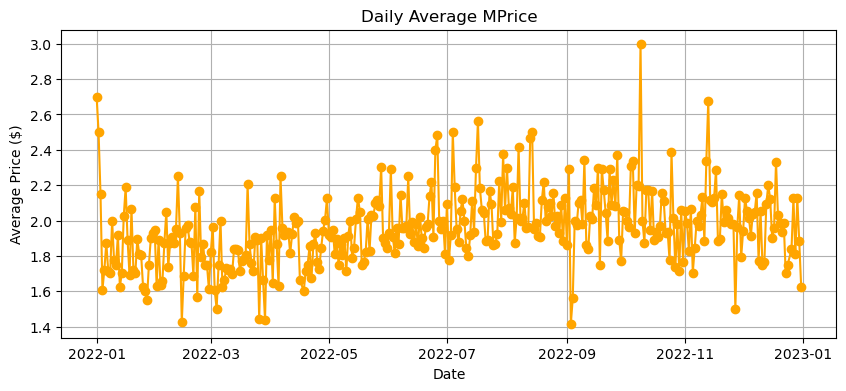

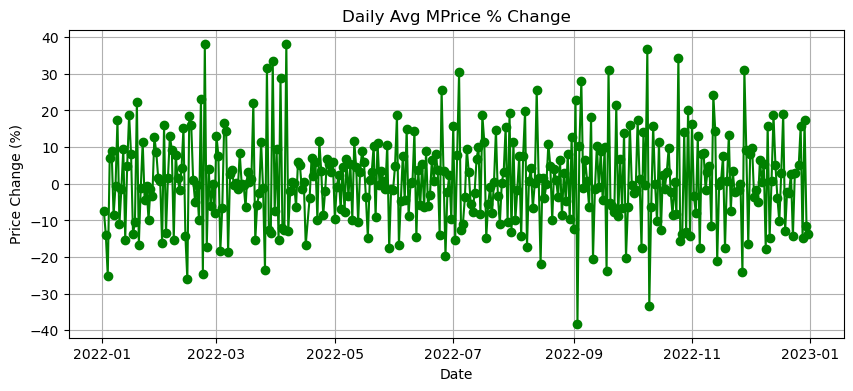

,TransDate,AvgMPrice,PricePctChange
0,2022-01-01,2.700000,NaN
1,2022-01-02,2.500000,-7.407407
2,2022-01-03,2.150000,-14.000000
3,2022-01-04,1.609375,-25.145349
4,2022-01-05,1.722222,7.011866
...,...,...,...
357,2022-12-27,2.125000,15.646259
358,2022-12-28,1.808824,-14.878893
359,2022-12-29,2.125000,17.479675
360,2022-12-30,1.882812,-11.397059


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load
df = pd.read_csv("../vending_machine_sales.csv")

# Convert dates
df["TransDate"] = pd.to_datetime(df["TransDate"], errors="coerce")

# Daily average MPrice (across all products)
daily_price = (
    df.groupby("TransDate")["MPrice"]
      .mean()
      .reset_index(name="AvgMPrice")
)

# % change in average MPrice
daily_price["PricePctChange"] = daily_price["AvgMPrice"].pct_change() * 100

# Plot daily average MPrice
plt.figure(figsize=(10,4))
plt.plot(daily_price["TransDate"], daily_price["AvgMPrice"], marker="o", color="orange")
plt.title("Daily Average MPrice")
plt.xlabel("Date")
plt.ylabel("Average Price ($)")
plt.grid(True)
plt.show()

# Plot % change in average MPrice
plt.figure(figsize=(10,4))
plt.plot(daily_price["TransDate"], daily_price["PricePctChange"], marker="o", color="green")
plt.title("Daily Avg MPrice % Change")
plt.xlabel("Date")
plt.ylabel("Price Change (%)")
plt.grid(True)
plt.show()

display(daily_price)


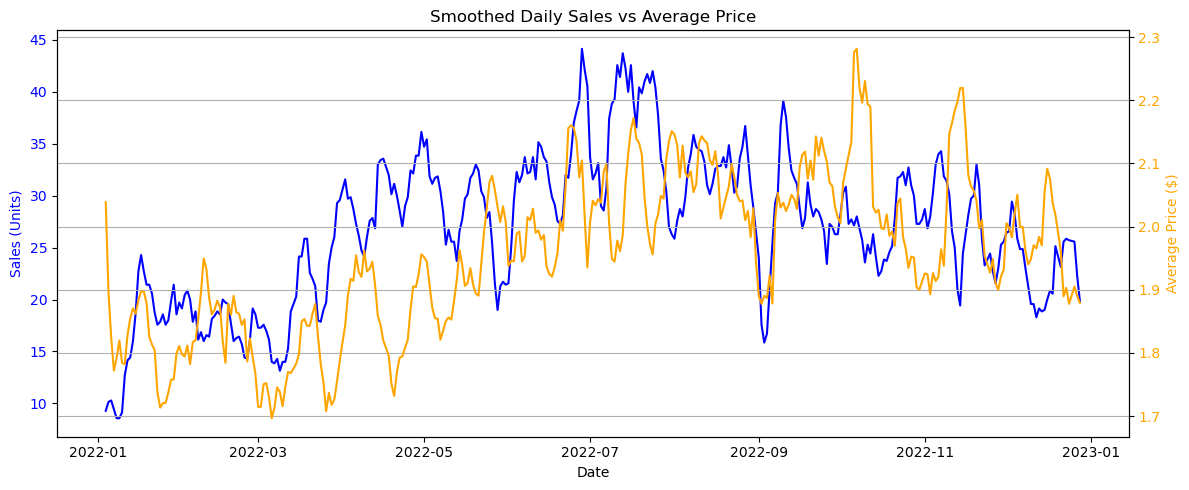

,TransDate,SalesCount,Sales_Smoothed,AvgPrice,Price_Smoothed
0,2022-01-01,5,NaN,2.700000,NaN
1,2022-01-02,1,NaN,2.500000,NaN
2,2022-01-03,15,NaN,2.150000,NaN
3,2022-01-04,16,9.285714,1.609375,2.038698
4,2022-01-05,9,10.142857,1.722222,1.896490
5,2022-01-06,12,10.285714,1.875000,1.825061
6,2022-01-07,7,9.428571,1.714286,1.771887
7,2022-01-08,11,8.571429,1.704545,1.791976
8,2022-01-09,2,8.571429,2.000000,1.819754
9,2022-01-10,9,9.142857,1.777778,1.784039


In [ ]:
# Load
df = pd.read_csv("../vending_machine_sales.csv")

# Convert dates
df["TransDate"] = pd.to_datetime(df["TransDate"], errors="coerce")

# Daily total sales (all products combined)
daily_sales = (
    df.groupby("TransDate")
      .size()
      .reset_index(name="SalesCount")
)

# Daily average product price
daily_avg_price = (
    df.groupby("TransDate")["MPrice"]
      .mean()
      .reset_index(name="AvgPrice")
)

# Merge sales and avg price
daily = pd.merge(daily_sales, daily_avg_price, on="TransDate")


# Smooth both series (7-day rolling mean, adjust window if needed)
daily["Sales_Smoothed"] = daily["SalesCount"].rolling(window=7, center=True).mean()
daily["Price_Smoothed"] = daily["AvgPrice"].rolling(window=7, center=True).mean()
daily = daily.dropna()

# Plot overlay: smoothed sales vs smoothed price
fig, ax1 = plt.subplots(figsize=(12,5))

ax1.set_xlabel("Date")
ax1.set_ylabel("Sales (Units)", color="blue")
ax1.plot(daily["TransDate"], daily["Sales_Smoothed"], color="blue", label="Sales (7d avg)")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.set_ylabel("Average Price ($)", color="orange")
ax2.plot(daily["TransDate"], daily["Price_Smoothed"], color="orange", label="Avg Price (7d avg)")
ax2.tick_params(axis="y", labelcolor="orange")

plt.title("Smoothed Daily Sales vs Average Price")
fig.tight_layout()
plt.grid(True)
plt.show()

display(daily[["TransDate","SalesCount","Sales_Smoothed","AvgPrice","Price_Smoothed"]].head(15))

This is average MPrice per day across products, not weighted by sales volume.

That means:

- If more people buy Red Bull vs chips, it does not make the daily average price go up.

- The average is just the mean of all products’ configured MPrice values on that day, regardless of how many units sold.

- For average price to rise, the actual set prices of products must be higher (e.g., the machine has more premium items, or price settings are changed).